In [1]:
from data_utils import get_class_names, calculate_ece
from data_utils import calculate_mce, calculate_cece, calculate_ace
from plot_utils import plot_loss, plot_histogram_balance_of_dataset, plot_confusion_matrix, plot_multiclass_roc_auc, \
    plot_metrics_table, plot_histogram_confidence
from model import Model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from plot_utils import plot_multiclass_calibration_curve

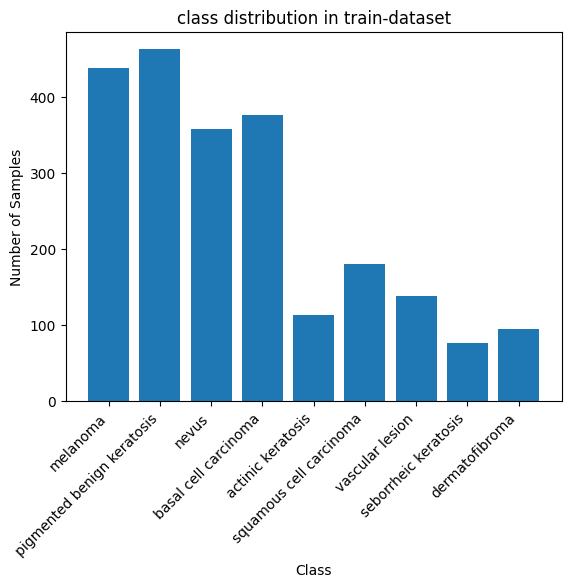

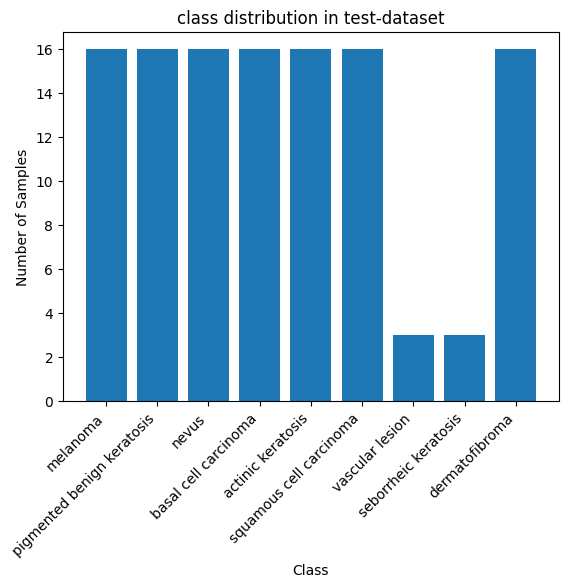

In [2]:
train_val_split_ratio = 0.8
batch_size = 64
learning_rate = 1e-3
patience_early_stopping = 15
patience_reduce_learning_rate = 4
weight_decay = 1e-3  
momentum = 0.9
epochs = 30
train_dir = "Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir = "Skin cancer ISIC The International Skin Imaging Collaboration/Test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate, train_dir=train_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir,
              train_val_split_ratio=train_val_split_ratio)
plot_histogram_balance_of_dataset(train_dir, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(test_dir, "class distribution in test-dataset")

In [3]:
train_losses, val_losses = model.train_model(epochs)

Epoch 1/30, Train Loss: 1.9565, Validation Loss: 1.6594, Learning Rate: 0.001
Epoch 2/30, Train Loss: 1.3679, Validation Loss: 1.3683, Learning Rate: 0.001
Epoch 3/30, Train Loss: 1.0428, Validation Loss: 1.1773, Learning Rate: 0.001
Epoch 4/30, Train Loss: 0.8201, Validation Loss: 1.0740, Learning Rate: 0.001
Epoch 5/30, Train Loss: 0.6740, Validation Loss: 1.0037, Learning Rate: 0.001
Epoch 6/30, Train Loss: 0.5566, Validation Loss: 0.9743, Learning Rate: 0.001
Epoch 7/30, Train Loss: 0.4573, Validation Loss: 0.9596, Learning Rate: 0.001
Epoch 8/30, Train Loss: 0.3674, Validation Loss: 0.9517, Learning Rate: 0.001
Epoch 9/30, Train Loss: 0.3081, Validation Loss: 0.9686, Learning Rate: 0.001
Epoch 10/30, Train Loss: 0.2633, Validation Loss: 0.9551, Learning Rate: 0.001


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x122a60ee0>
Traceback (most recent call last):
  File "/Users/michael/PycharmProjects/ModelCalibrationDeepLearning/venev/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/Users/michael/PycharmProjects/ModelCalibrationDeepLearning/venev/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/local/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/local/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/local/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/li

KeyboardInterrupt: 

In [4]:
plot_loss(train_losses, val_losses)

NameError: name 'train_losses' is not defined

In [5]:
true_labels, predicted_labels_baseline, confidence_baseline, _, logits_baseline = model.evaluate()

In [6]:

model.optimize_platt_scaling(lr=1e-1)
model.optimize_temperature(lr=1e-1)
model.optimize_histogram_binning(n_bins=200)

In [7]:
predicted_labels_platt_scaling, confidence_platt_scaling = model.evaluate_with_platt_scaling(logits_baseline)

predicted_labels_temperature_scaling, confidence_temperature_scaling = model.evaluate_with_temperature_scaling(
    logits_baseline)

predicted_labels_histogram_binning, confidence_histogram_binning = model.evaluate_with_histogram_binning(
    confidence_baseline)


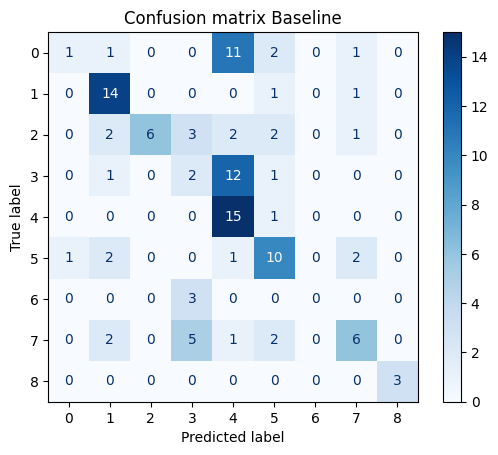

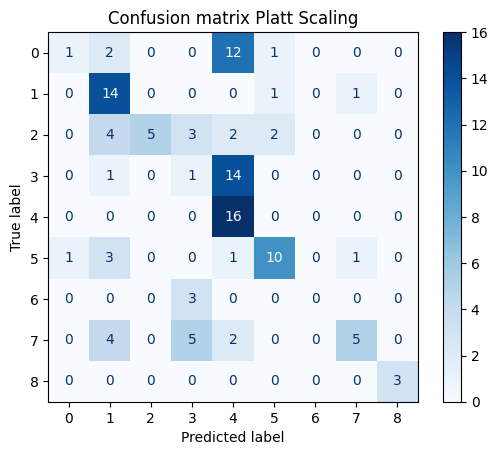

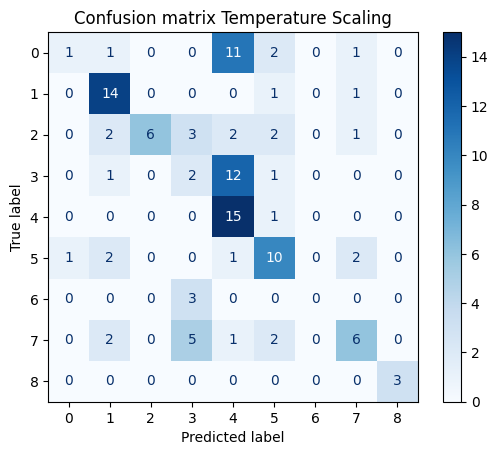

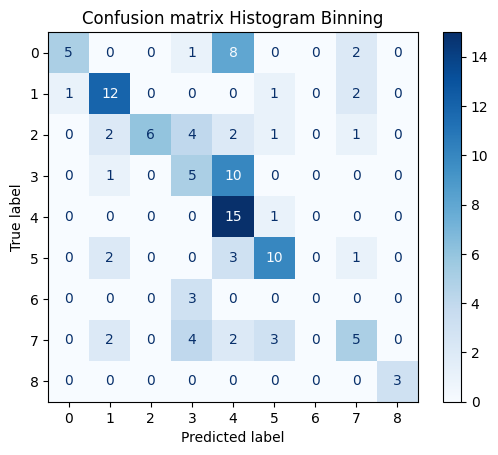

In [8]:
plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_baseline,
                      title="Confusion matrix Baseline")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_platt_scaling,
                      title="Confusion matrix Platt Scaling")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_temperature_scaling,
                      title="Confusion matrix Temperature Scaling")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_histogram_binning,
                      title="Confusion matrix Histogram Binning")

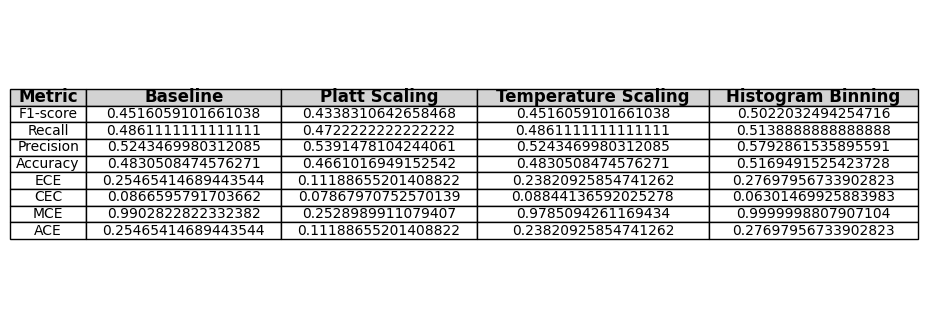

In [9]:
results = {
    "Metric": ["F1-score", "Recall", "Precision", "Accuracy", "ECE", "CEC", "MCE", "ACE"],
    "Baseline": [
        f1_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        recall_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        precision_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        accuracy_score(true_labels, predicted_labels_baseline),
        calculate_ece(true_labels, confidence_baseline[:, 1]),
        calculate_cece(true_labels, confidence_baseline),
        calculate_mce(true_labels, confidence_baseline[:, 1]),
        calculate_ace(true_labels, confidence_baseline[:, 1])
    ],
    "Platt Scaling": [
        f1_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        recall_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        precision_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        accuracy_score(true_labels, predicted_labels_platt_scaling),
        calculate_ece(true_labels, confidence_platt_scaling[:, 1]),
        calculate_cece(true_labels, confidence_platt_scaling),
        calculate_mce(true_labels, confidence_platt_scaling[:, 1]),
        calculate_ace(true_labels, confidence_platt_scaling[:, 1])
    ],
    "Temperature Scaling": [
        f1_score(true_labels, predicted_labels_temperature_scaling, average='macro',
                 zero_division=0),
        recall_score(true_labels, predicted_labels_temperature_scaling, average='macro',
                     zero_division=0),
        precision_score(true_labels, predicted_labels_temperature_scaling, average='macro',
                        zero_division=0),
        accuracy_score(true_labels, predicted_labels_temperature_scaling),
        calculate_ece(true_labels, confidence_temperature_scaling[:, 1]),
        calculate_cece(true_labels, confidence_temperature_scaling),
        calculate_mce(true_labels, confidence_temperature_scaling[:, 1]),
        calculate_ace(true_labels, confidence_temperature_scaling[:, 1])
    ],
    "Histogram Binning": [
        f1_score(true_labels, predicted_labels_histogram_binning, average='macro',
                 zero_division=0),
        recall_score(true_labels, predicted_labels_histogram_binning, average='macro',
                     zero_division=0),
        precision_score(true_labels, predicted_labels_histogram_binning, average='macro',
                        zero_division=0),
        accuracy_score(true_labels, predicted_labels_histogram_binning),
        calculate_ece(true_labels, confidence_histogram_binning[:, 1]),
        calculate_cece(true_labels, confidence_histogram_binning),
        calculate_mce(true_labels, confidence_histogram_binning[:, 1]),
        calculate_ace(true_labels, confidence_histogram_binning[:, 1])
    ],
}

plot_metrics_table(results)

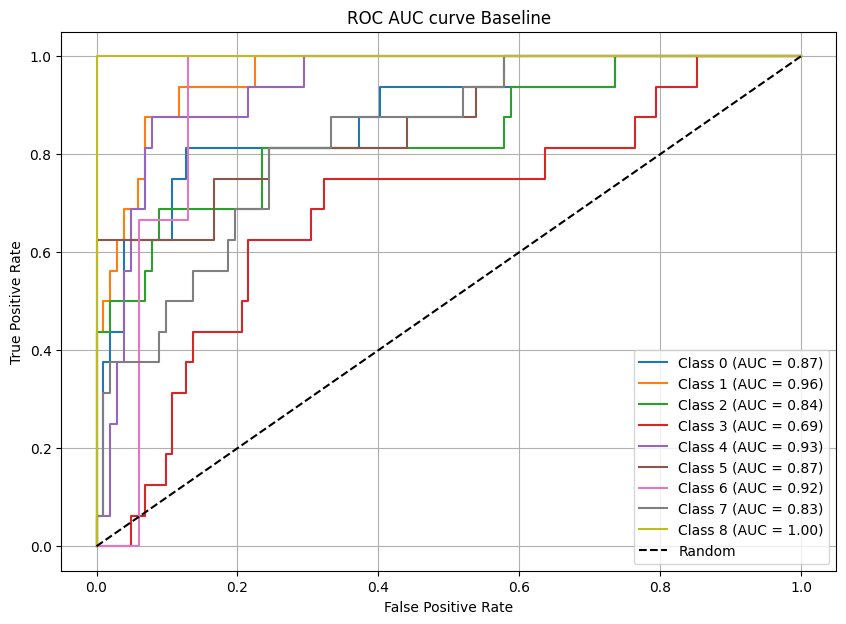

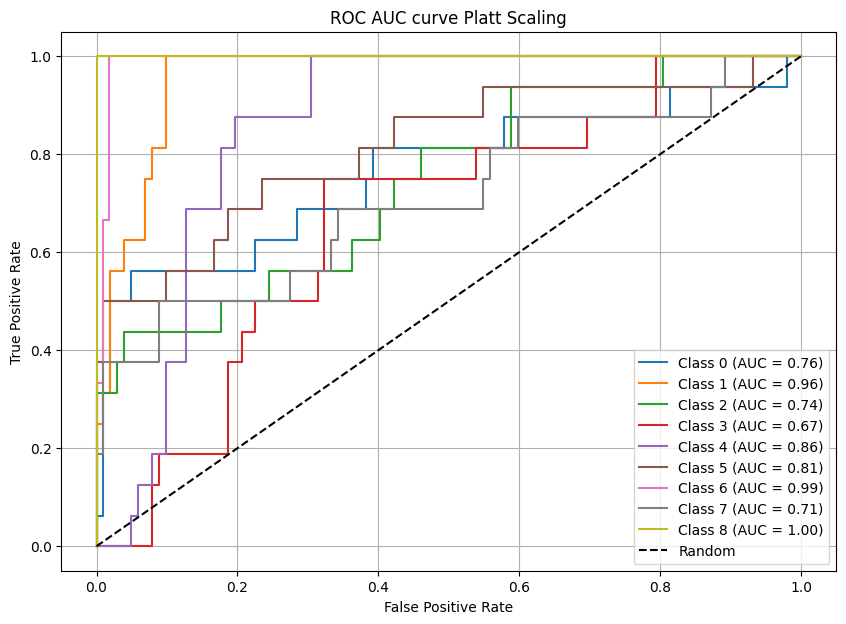

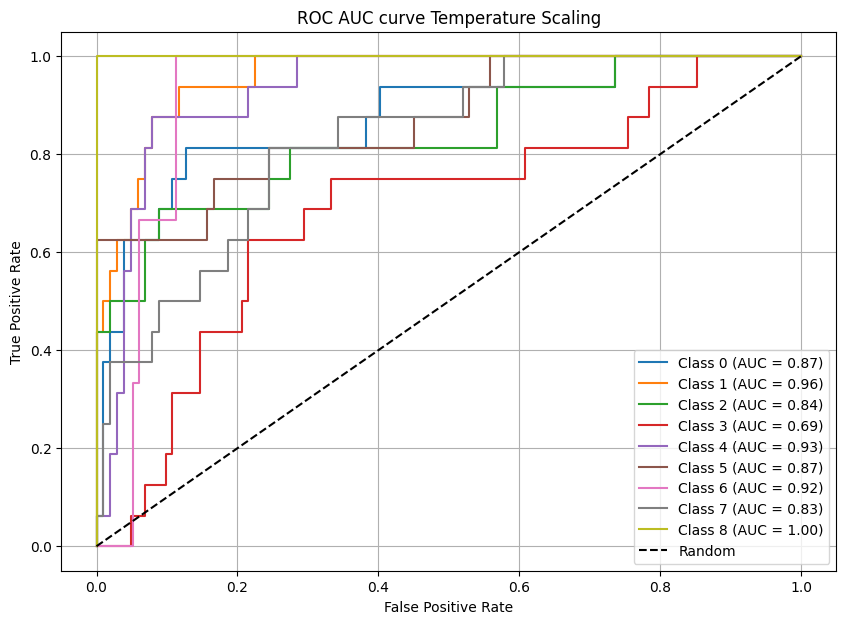

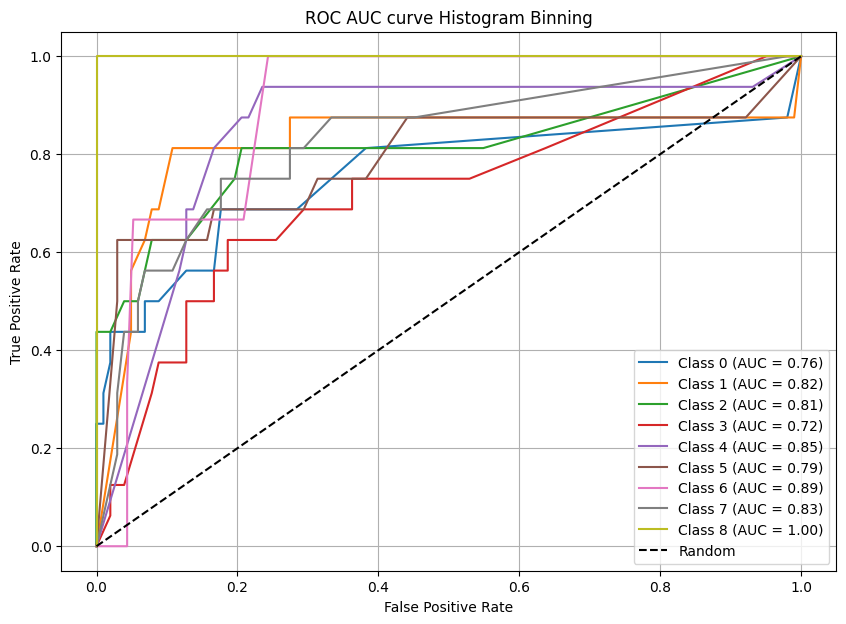

In [10]:
plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_baseline,
                        title="ROC AUC curve Baseline")

plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_platt_scaling,
                        title="ROC AUC curve Platt Scaling")

plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_temperature_scaling,
                        title="ROC AUC curve Temperature Scaling")

plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_histogram_binning,
                        title="ROC AUC curve Histogram Binning")

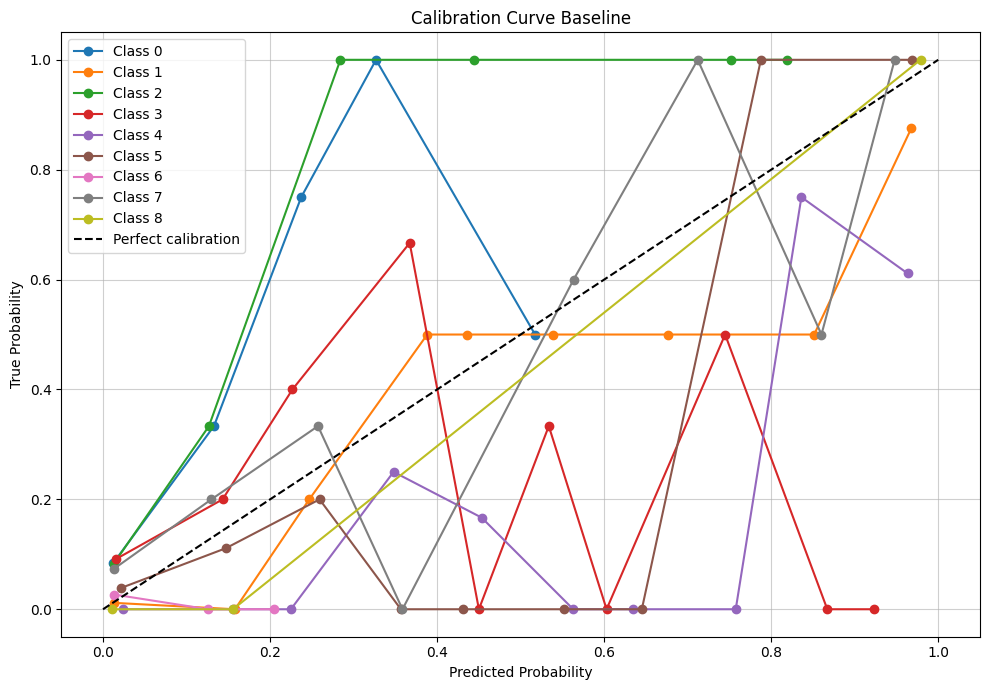

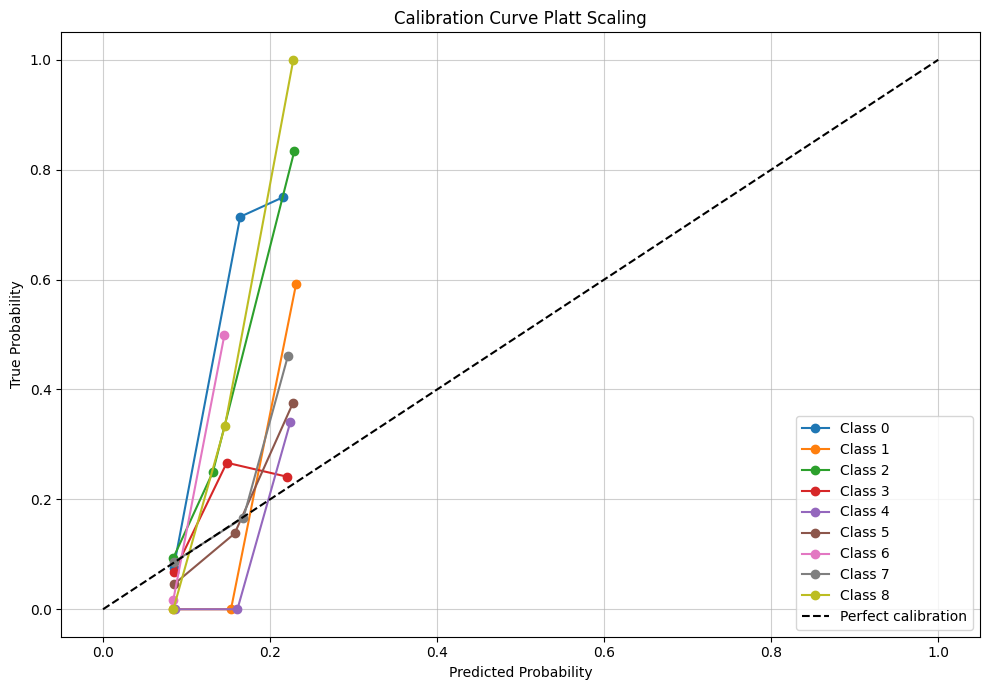

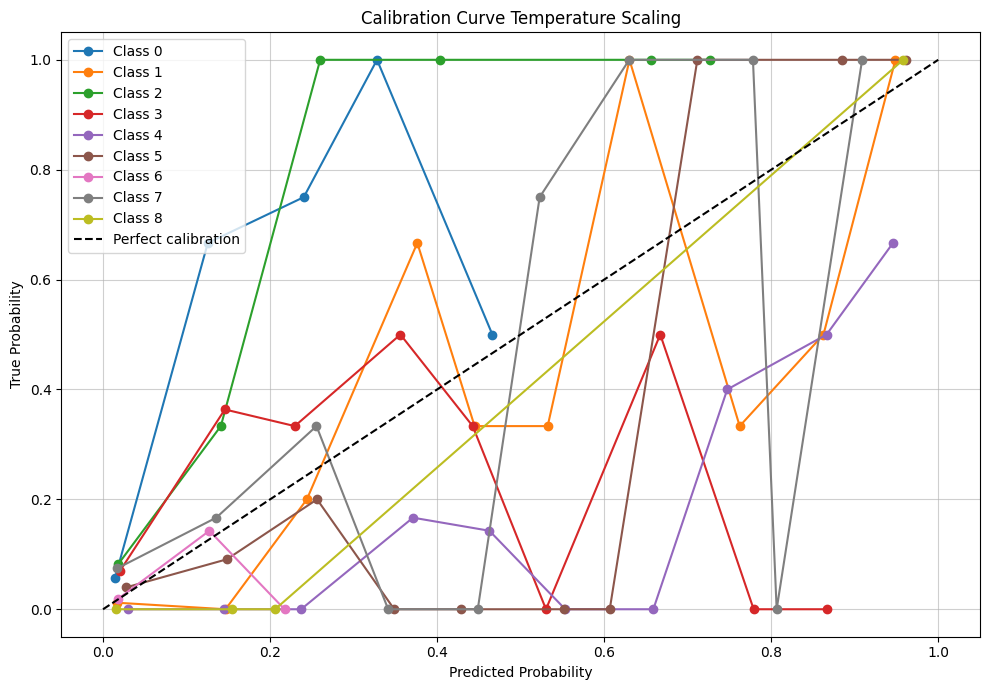

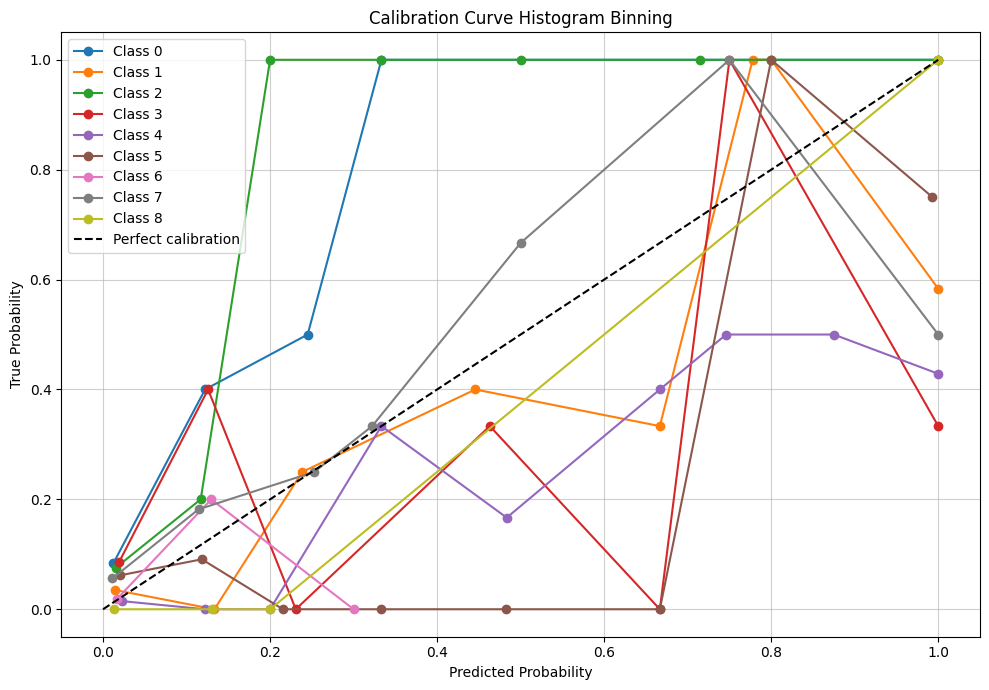

In [11]:
plot_multiclass_calibration_curve(true_labels, confidence_baseline,
                                  title="Calibration Curve Baseline")

plot_multiclass_calibration_curve(true_labels, confidence_platt_scaling,
                                  title="Calibration Curve Platt Scaling")

plot_multiclass_calibration_curve(true_labels, confidence_temperature_scaling,
                                  title="Calibration Curve Temperature Scaling")

plot_multiclass_calibration_curve(true_labels, confidence_histogram_binning,
                                  title="Calibration Curve Histogram Binning")

In [12]:
class_mappings = model.get_class_mappings()
index_pneumonia = class_mappings['PNEUMONIA']
plot_histogram_confidence(confidence_baseline[:, index_pneumonia], 'PNEUMONIA', "Histogram Calibration of Baseline")
plot_histogram_confidence(confidence_platt_scaling[:, index_pneumonia], 'PNEUMONIA', "Histogram Calibration of Platt Scaling")
plot_histogram_confidence(confidence_temperature_scaling[:, index_pneumonia],'PNEUMONIA',
                          "Histogram Calibration of Temperature Scaling")
plot_histogram_confidence(confidence_histogram_binning[:, index_pneumonia], 'PNEUMONIA',
                          "Histogram Calibration of Histogram Binning")


KeyError: 'PNEUMONIA'

In [13]:
import torch
torch.save(model.model.state_dict(), "model.pth")

In [3]:
model.load_existing_model("model.pth")

Model loaded from model.pth
